# Final Project Technical Notebook

Name(s): Bilal Najar, Kevin Akman
Date: 11/28/2023

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import math
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KernelDensity
import seaborn as sns
import random
from scipy.stats import norm, dgamma, geom, t



In [4]:
# grab local dataset
import os

heart_df = pd.read_csv(r'heart.csv')
heart_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Encoding categorical variables
label_encoders = {}
for col in heart_df.columns:
    le = LabelEncoder()
    heart_df[col] = le.fit_transform(heart_df[col])
    label_encoders[col] = le

# Splitting data
X = heart_df.drop('HeartDisease', axis=1)
y = heart_df['HeartDisease']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)

# Initialize and train the logistic regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=27)
logistic_model.fit(X_train, y_train)

# Generating predictions
y_pred = logistic_model.predict(X_test)
y_pred = logistic_model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.87
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       126
           1       0.88      0.88      0.88       150

    accuracy                           0.87       276
   macro avg       0.87      0.87      0.87       276
weighted avg       0.87      0.87      0.87       276



In [7]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=27)

# Train the model on the training data
random_forest_model.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate the model's performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Model Accuracy: {accuracy_rf:.2f}")
print(classification_report(y_test, y_pred_rf))

# Adding a confusion matrix to understand the performance better
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_rf)
print(cm)

Random Forest Model Accuracy: 0.89
              precision    recall  f1-score   support

           0       0.91      0.84      0.87       126
           1       0.87      0.93      0.90       150

    accuracy                           0.89       276
   macro avg       0.89      0.88      0.89       276
weighted avg       0.89      0.89      0.89       276

[[106  20]
 [ 11 139]]


              Age   RestingBP  Cholesterol       MaxHR
count  918.000000  918.000000   918.000000  918.000000
mean    25.510893   32.899782    81.640523   62.979303
std      9.432617   14.098608    58.742803   24.919644
min      0.000000    0.000000     0.000000    0.000000
25%     19.000000   22.000000    33.250000   46.000000
50%     26.000000   31.000000    81.000000   64.000000
75%     32.000000   41.000000   125.000000   82.000000
max     49.000000   66.000000   221.000000  118.000000
Sex
1    725
0    193
Name: count, dtype: int64
ChestPainType
0    496
2    203
1    173
3     46
Name: count, dtype: int64
FastingBS
0    704
1    214
Name: count, dtype: int64
RestingECG
1    552
0    188
2    178
Name: count, dtype: int64
ExerciseAngina
0    547
1    371
Name: count, dtype: int64
ST_Slope
1    460
2    395
0     63
Name: count, dtype: int64
HeartDisease
1    508
0    410
Name: count, dtype: int64
                     Age       Sex  ChestPainType  RestingBP  Cholesterol  \
Age     

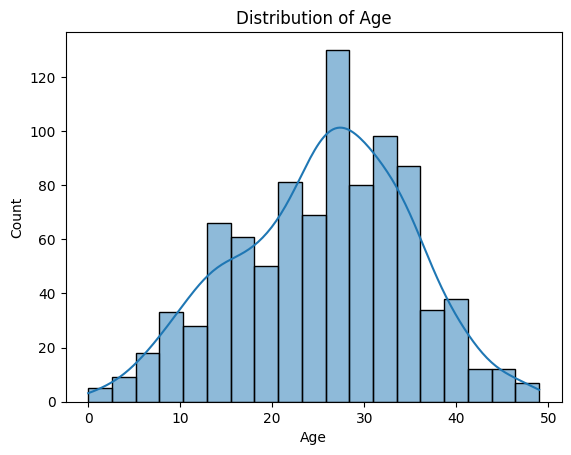

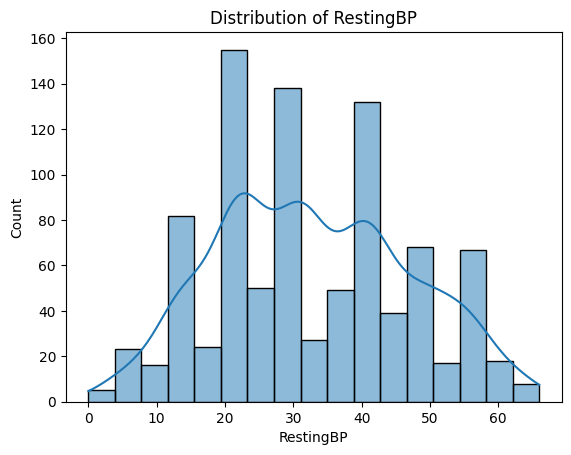

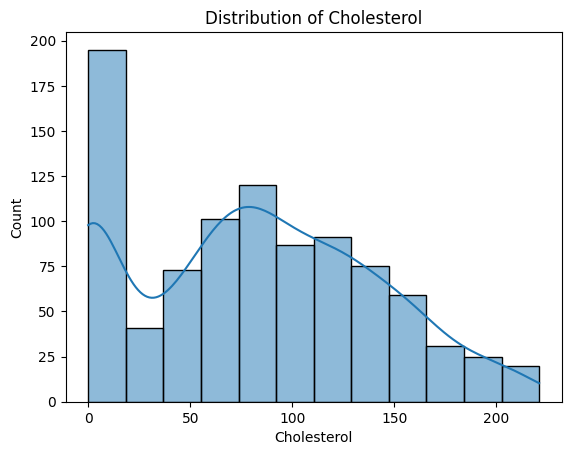

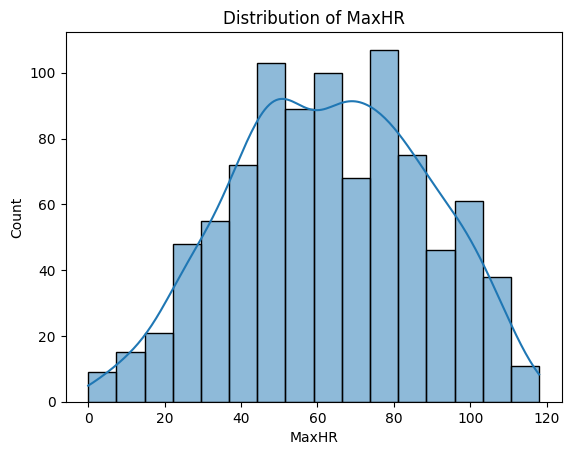

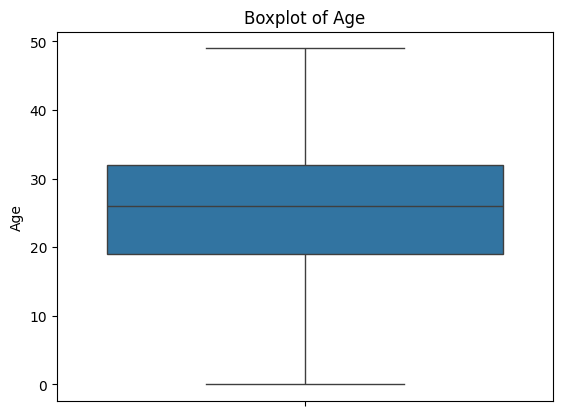

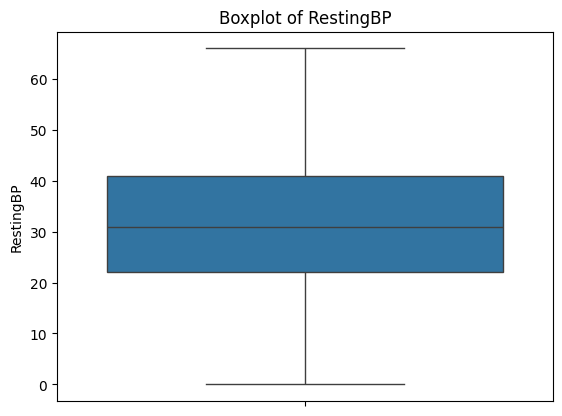

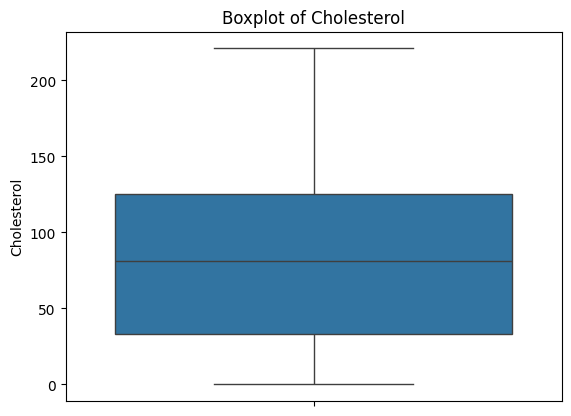

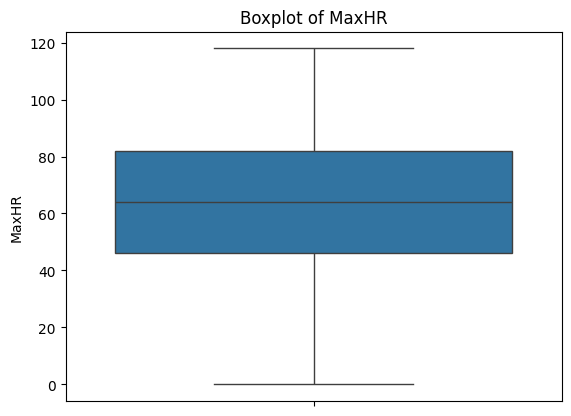

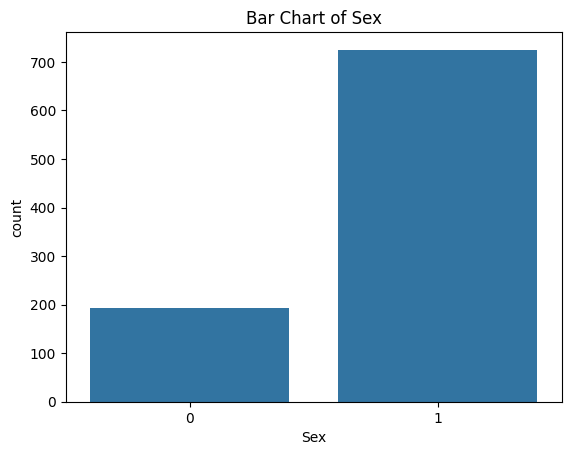

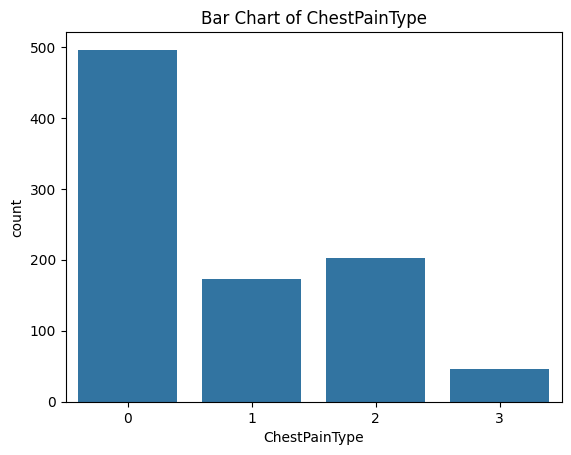

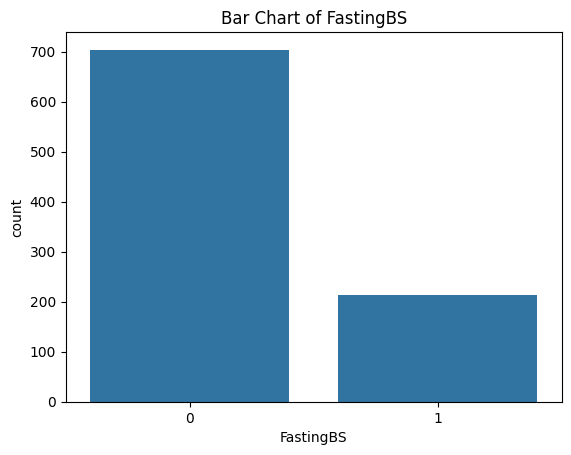

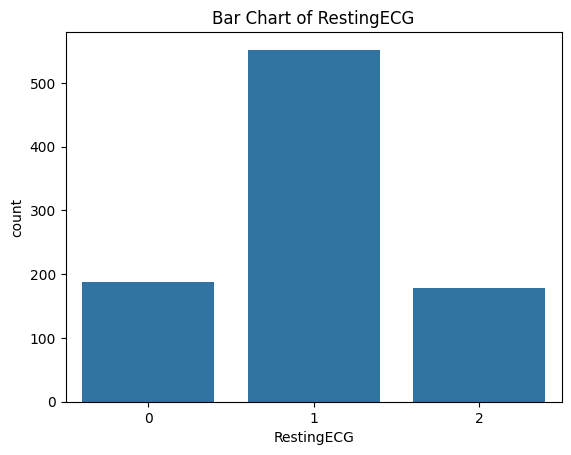

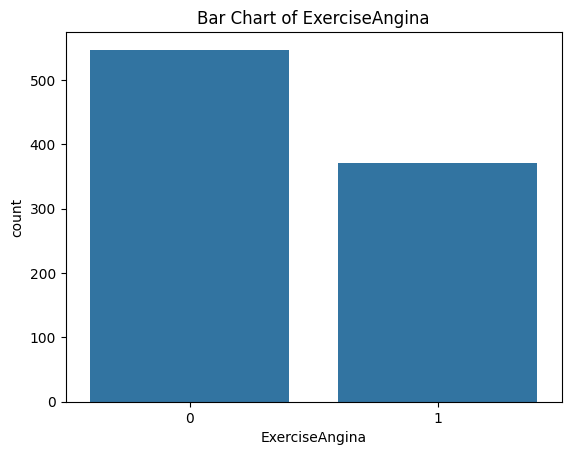

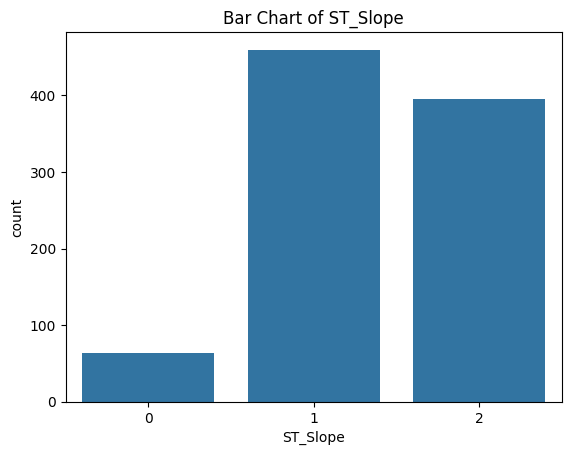

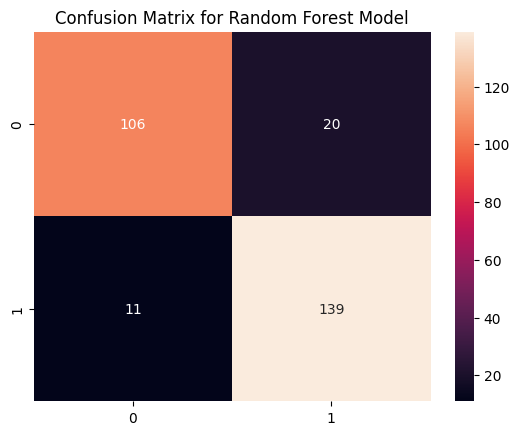

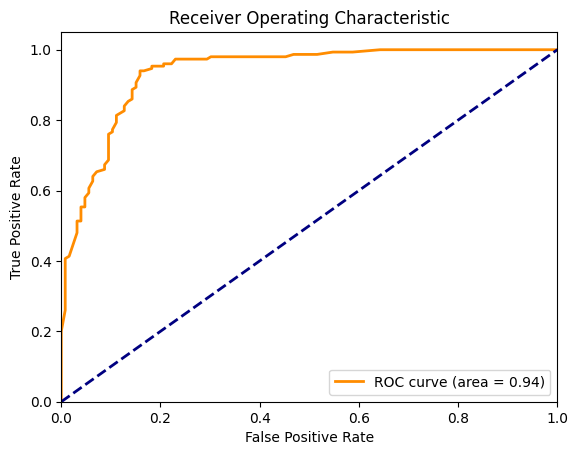

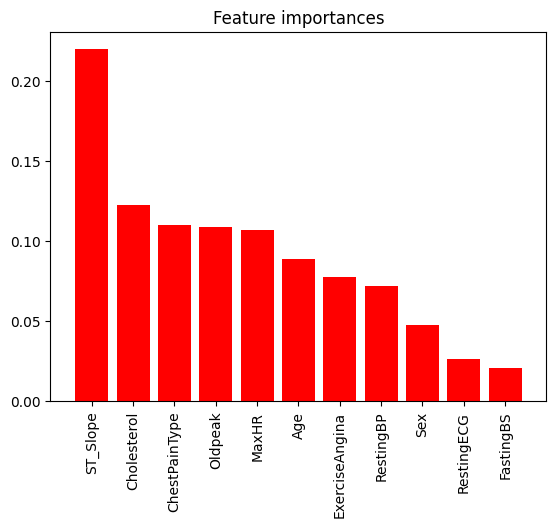

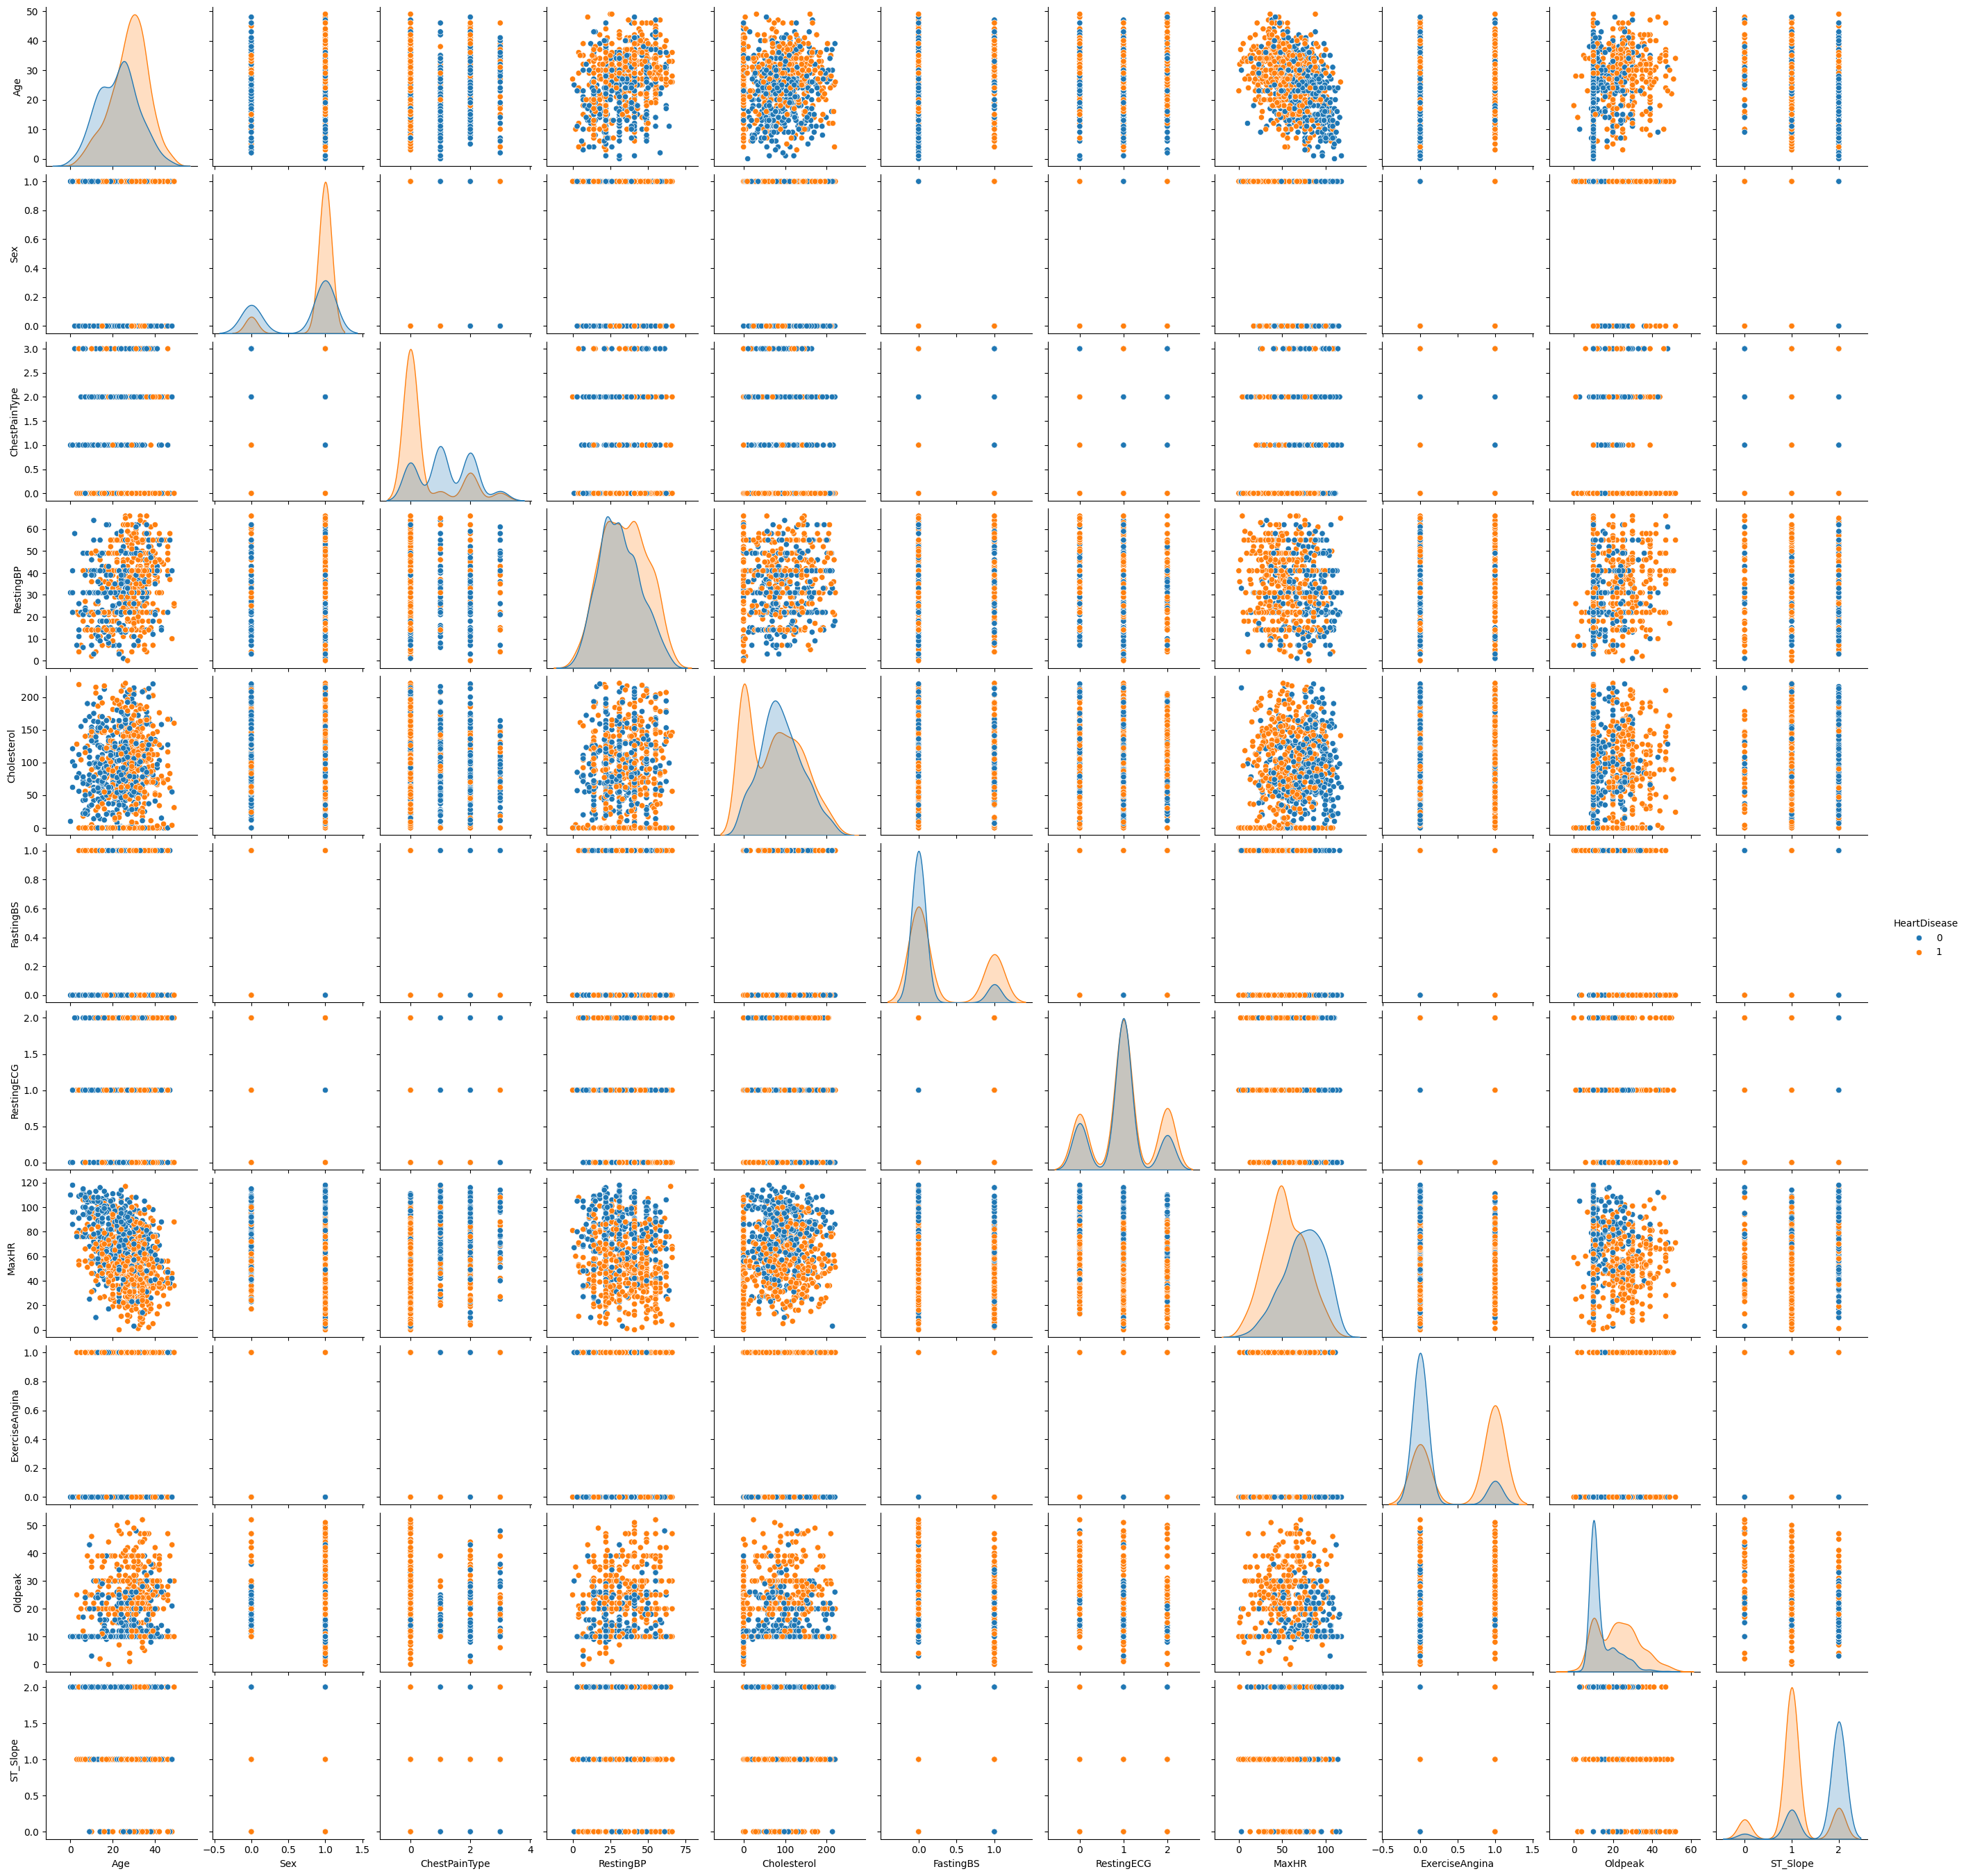

In [8]:
# Descriptive Statistics for continuous variables
print(heart_df[['Age', 'RestingBP', 'Cholesterol', 'MaxHR']].describe())

# Frequency count for categorical variables
print(heart_df['Sex'].value_counts())
print(heart_df['ChestPainType'].value_counts())
print(heart_df['FastingBS'].value_counts())
print(heart_df['RestingECG'].value_counts())
print(heart_df['ExerciseAngina'].value_counts())
print(heart_df['ST_Slope'].value_counts())
print(heart_df['HeartDisease'].value_counts())

# Correlation Matrix
corr_matrix = heart_df.corr()
print(corr_matrix)

# Histograms for continuous variables
for column in ['Age', 'RestingBP', 'Cholesterol', 'MaxHR']:
    sns.histplot(heart_df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

# Boxplots for continuous variables
for column in ['Age', 'RestingBP', 'Cholesterol', 'MaxHR']:
    sns.boxplot(y=heart_df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

# Bar Charts for categorical variables
for column in ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']:
    sns.countplot(x=heart_df[column])
    plt.title(f'Bar Chart of {column}')
    plt.show()

# Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

# ROC Curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, random_forest_model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Feature Importance Plot for Random Forest
importances = random_forest_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

# Pair Plot (This can be computationally intensive depending on the dataset size)
sns.pairplot(heart_df, hue='HeartDisease')
plt.show()
